In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import ipywidgets as widgets
from IPython.display import display
import random

# 1. VISUALIZATION OF THE RUMOR SPREADING WITHIN A POPULATION

Recall that:



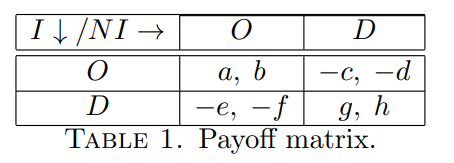

In [109]:
#CHOOSE YOUR PARAMETERS

#WHEN YOU SPREAD THE RUMOR
Utility_supporting_original_content = 1            # a
Cost_transmitting_opposite_rumor_original = 1      # c
Cost_transmitting_opposite_rumor_distorted = 1    # e
Utility_supporting_distorted_content = 1          # g

#WHEN YOU RECEIVE THE RUMOR
Utility_receiving_consistent_rumor_original = 1   # b
Cost_receiving_opposite_rumor_original = 1        # d
Cost_receiving_opposite_rumor_distorted = 1        # f
Utility_receiving_consistent_rumor_distorted = 1   # h

#INITIAL CONDITIONS
initial_original_informed = 3
initial_distorted_informed = 1
initial_original_noninformed = 22
initial_distorted_noninformed = 8

In [123]:

a = Utility_supporting_original_content
b = Utility_receiving_consistent_rumor_original
c = Cost_transmitting_opposite_rumor_original
d = Cost_receiving_opposite_rumor_original
e = Cost_transmitting_opposite_rumor_distorted
f = Cost_receiving_opposite_rumor_distorted
g = Utility_supporting_distorted_content
h = Utility_receiving_consistent_rumor_distorted


prob_oi = (h + f) / (b + d + h + f)
prob_oni = (g + c) / (a + c + e + g)
prob_di = (b + d) / (b + d + h + f)
prob_dni = (a + e) / (a + c + e + g)



population_size = (
    initial_original_informed
    + initial_distorted_informed
    + initial_original_noninformed
    + initial_distorted_noninformed
)

iterations = initial_original_noninformed + initial_distorted_noninformed

nb_oi = initial_original_informed
nb_oni = initial_original_noninformed
nb_di = initial_distorted_informed
nb_dni = initial_distorted_noninformed

size_fig = 500

plot_colors = {"original": "green", "distorted": "purple"}

population_informed = []
population_noninformed = []

# Add "original" vectors
for i in range(initial_original_informed):
    vector = ["original", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_informed.append(vector)

# Add "distorted" vectors
for i in range(initial_distorted_informed):
    vector = ["distorted", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_informed.append(vector)

# Add "original" vectors
for i in range(initial_original_noninformed):
    vector = ["original", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_noninformed.append(vector)

# Add "distorted" vectors
for i in range(initial_distorted_noninformed):
    vector = ["distorted", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_noninformed.append(vector)




# Create sliders for the parameters
slider_iterations = widgets.IntSlider(
    value=iterations, min=0, max=iterations, step=1, description="Iterations"
)

x0=[x[1] for x in population_informed + population_noninformed]
y0=[x[2] for x in population_informed + population_noninformed]
colors0 = [plot_colors[x[0]] for x in population_informed] + ["black"] * len(population_noninformed)
vectors=[([x0,y0,colors0])]

for i in range(iterations):
    indice_i = random.randint(0, nb_oi + nb_di - 1)
    indice_ni = random.randint(0, nb_oni + nb_dni - 1)

    if population_informed[indice_i][0] == "original":
        if random.random() < prob_oi:
            population_noninformed[indice_ni][0] = "original"
            nb_oni -= 1
        else:
            population_noninformed[indice_ni][0] = "distorted"
            nb_dni -= 1
        nb_oi += 1

    elif population_informed[indice_i][0] == "distorted":
        if random.random() < prob_di:
            population_noninformed[indice_ni][0] = "distorted"
            nb_dni -= 1
        else:
            population_noninformed[indice_ni][0] = "original"
            nb_oni -= 1
        nb_di += 1

    population_informed.append(population_noninformed[indice_ni])
    del population_noninformed[indice_ni]

    # Extract the coordinates and colors for the scatter plot
    xs = [x[1] for x in population_informed + population_noninformed]
    ys = [x[2] for x in population_informed + population_noninformed]
    colors = [plot_colors[x[0]] for x in population_informed] + ["black"] * len(population_noninformed)
    vector=[xs, ys, colors]
    vectors.append(vector)



def update_plot(iteration):


    plot_colors = {"original": "green", "distorted": "purple"}

    # Create an empty scatter plot
    fig, ax = plt.subplots(figsize=(6, 6))
    #scatter = ax.scatter([], [], c="black",label=plot_colors)
    scatter = ax.scatter([], [], c="black", s=100)
    

  

    # Set plot limits
    ax.set_xlim(0, size_fig)
    ax.set_ylim(0, size_fig)

    # Set plot labels
    #ax.set_xlabel("X")
    #ax.set_ylabel("Y")


    scatter.set_offsets(np.column_stack([vectors[iteration][0], vectors[iteration][1]]))
    scatter.set_color(vectors[iteration][2])


    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Original',
                                  markerfacecolor=plot_colors["original"], markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Distorted',
                                  markerfacecolor=plot_colors["distorted"], markersize=10)]
    ax.legend(handles=legend_elements, loc=(1.04, 1))
    




    # Add arrow pointing to the chosen dot in non-informed population
    #chosen_vector = population_noninformed[iteration]
    #arrow = FancyArrow(
        #chosen_vector[1],
        #chosen_vector[2],
        #vector[1] - chosen_vector[1],
        #vector[2] - chosen_vector[2],
        #width=0.1,
        #color="black",
        #length_includes_head=True,
        #head_width=5,
    #)
    #ax.add_patch(arrow)




    ax.set_title(f"Iteration: {iteration}")
    plt.draw()


widgets.interact(update_plot, iteration=slider_iterations)


interactive(children=(IntSlider(value=30, description='Iterations', max=30), Output()), _dom_classes=('widget-…

<function __main__.update_plot(iteration)>

# 2. SIMULATION WITH CONSTANT PARAMETERS

In [39]:
# SETTING SYSTEM EQUATIONS (P.19):
def f_rumor(x,y):
    return (x*(1-x)*(y*H1 + K1), y*(1-y)*(x*H2 + K2))

In [40]:
#CHOOSE YOUR PARAMETERS

#WHEN YOU SPREAD THE RUMOR
Utility_supporting_original_content = 1
Cost_transmitting_opposite_rumor_original = 1
Cost_transmitting_opposite_rumor_distorted = -8
Utility_supporting_distorted_content = -3

#WHEN YOU RECEIVE THE RUMOR
Utility_receiving_consistent_rumor_original = -2
Cost_receiving_opposite_rumor_original = 3
Cost_receiving_opposite_rumor_distorted = 1
Utility_receiving_consistent_rumor_distorted = 1

#INITIAL CONDITIONS
proportion_original_informed_init = 0.9              #PERCENTAGE OF INFORMED INDIVIDUALS THAT ARE WILLING TO SPREAD THE ORIGINAL CONTENT OF THE RUMOR
proportion_original_noninformed_init = 0.8           #PERCENTAGE OF NON-INFORMED INDIVIDUALS THAT ARE WILLING TO SPREAD THE ORIGINAL CONTENT OF THE RUMOR
max_time = 20

In [73]:
#Interactive vector field

a = Utility_supporting_original_content
b = Utility_receiving_consistent_rumor_original
c = Cost_transmitting_opposite_rumor_original
d = Cost_receiving_opposite_rumor_original
e = Cost_transmitting_opposite_rumor_distorted
f = Cost_receiving_opposite_rumor_distorted
g = Utility_supporting_distorted_content
h = Utility_receiving_consistent_rumor_distorted

H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f

def f_rumor_parameter(x,y,H1,K1,H2,K2):
    return (x*(1-x)*(y*H1 + K1), y*(1-y)*(x*H2 + K2))


def update_vector_field(a, b, c, d, e, f, g, h):
    plt.clf()

    dt = 0.001; max_time = 20

    H1 = a + c + e + g
    H2 = b + d + f + h
    K1 = -c - g
    K2 = -h - f


    x_test = np.linspace(0, 1, 20)
    y_test = np.linspace(0, 1, 20)
    x_test2=np.linspace(0, 1, 20)
    y_test2=np.linspace(0, 1, 20)

    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
    U_test, V_test = f_rumor_parameter(X_test,Y_test,H1,K1,H2,K2)


    plt.quiver(X_test, Y_test, U_test, V_test)
    C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)
    plt.contour(X_test, Y_test, C)

    plt.plot(-K2/H2,-K1/H1, 'o')
    plt.plot(0,0, 'o')
    plt.plot(1,1, 'o')
    plt.text(-K2/H2,-K1/H1,'Dynamical equilibrium' +str((-K2/H2,-K1/H1)))

    plt.xlabel('proportion of informed individal spreading O')
    plt.ylabel('proportion of non-informed individal spreading O')
    plt.title("Rumor spreading model")

    plt.show()


# Create sliders for the parameters
slider_a = widgets.FloatSlider(value=a, min=-10, max=10, step=0.1, layout=widgets.Layout(width='30%'))
slider_b = widgets.FloatSlider(value=b, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_c = widgets.FloatSlider(value=c, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_d = widgets.FloatSlider(value=d, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_e = widgets.FloatSlider(value=e, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_f = widgets.FloatSlider(value=f, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_g = widgets.FloatSlider(value=g, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_h = widgets.FloatSlider(value=h, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))


# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_vector_field, {
    'a': slider_a,
    'b': slider_b,
    'c': slider_c,
    'd': slider_d,
    'e': slider_e,
    'f': slider_f,
    'g': slider_g,
    'h': slider_h
})


upper_box1 = widgets.HBox([widgets.Label(value="a: Utility_supporting_original_content"), slider_a, widgets.Label(value="c: Cost_transmitting_opposite_rumor_original"), slider_c])
lower_box1 = widgets.HBox([widgets.Label(value="e: Cost_transmitting_opposite_rumor_distorted"), slider_e, widgets.Label(value="g: Utility_supporting_distorted_content"), slider_g])
box1 = widgets.VBox([upper_box1, lower_box1])

upper_box2 = widgets.HBox([widgets.Label(value="b: Utility_receiving_consistent_rumor_original"), slider_b, widgets.Label(value="d: Cost_receiving_opposite_rumor_original"), slider_d])
lower_box2 = widgets.HBox([widgets.Label(value="f: Cost_receiving_opposite_rumor_distorted"), slider_f, widgets.Label(value="h: Utility_receiving_consistent_rumor_distorted"), slider_h])
box2 = widgets.VBox([upper_box2, lower_box2])

accordion = widgets.Accordion(children=[box1, box2])
accordion.set_title(0, 'Spreading parameters')
accordion.set_title(1, 'Receiving parameters')
display(accordion)

# Display the sliders and the plot
#display(widgets.HBox([widgets.Label(value="a: Utility_supporting_original_content"), slider_a, widgets.Label(value="c: Cost_transmitting_opposite_rumor_original"), slider_c]))
#display(widgets.HBox([widgets.Label(value="e: Cost_transmitting_opposite_rumor_distorted"), slider_e, widgets.Label(value="g: Utility_supporting_distorted_content"), slider_g]))
#display(widgets.HBox([widgets.Label(value="b: Utility_receiving_consistent_rumor_original"), slider_b, widgets.Label(value="d: Cost_receiving_opposite_rumor_original"), slider_d]))
#display(widgets.HBox([widgets.Label(value="f: Cost_receiving_opposite_rumor_distorted"), slider_f, widgets.Label(value="h: Utility_receiving_consistent_rumor_distorted"), slider_h]))

display(interactive_plot)

Accordion(children=(VBox(children=(HBox(children=(Label(value='a: Utility_supporting_original_content'), Float…

Output()

In [96]:
#Interactive plot


x_init = proportion_original_informed_init
y_iniy = proportion_original_noninformed_init


def update_plot(a, b, c, d, e, f, g, h, x_init, y_init, max_time):
    plt.clf()

    dt = 0.001

    H1 = a + c + e + g
    H2 = b + d + f + h
    K1 = -c - g
    K2 = -h - f

    t = 0
    x = x_init
    y = y_init

    t_list = [t]
    x_list = [x]
    y_list = [y]

    while t < max_time:
        t = t + dt
        x = x + x * (1 - x) * (y * H1 + K1) * dt
        y = y + y * (1 - y) * (x * H2 + K2) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    

    plt.plot(t_list, np.ones(np.shape(x_list)) - x_list, "r", label="proportion of informed indiv. spreading original content")
    plt.plot(t_list, np.ones(np.shape(y_list)) - y_list, 'g', label="proportion of non-informed indiv. spreading original content")
    #plt.plot(t_list, x_list, "r", label="O_I")
    #plt.plot(t_list, y_list, 'g', label="O_NI")
    plt.xlabel('time')
    plt.ylabel('proportion')
    plt.title("Evolution of the original rumor over time")
    #plt.legend(loc="upper right")
    plt.legend(loc=(1.04, 1))
    plt.show()

# Create sliders for the parameters

slider_a = widgets.FloatSlider(value=a, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_b = widgets.FloatSlider(value=b, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_c = widgets.FloatSlider(value=c, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_d = widgets.FloatSlider(value=d, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_e = widgets.FloatSlider(value=e, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_f = widgets.FloatSlider(value=f, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_g = widgets.FloatSlider(value=g, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_h = widgets.FloatSlider(value=h, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))

slider_x_init = widgets.FloatSlider(value=x_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='initial OI')
slider_y_init = widgets.FloatSlider(value=y_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='initial ONI')

slider_max_time = widgets.FloatSlider(value=max_time, min=0, max=50, step=1, layout=widgets.Layout(width='500px'), description='max_time')

# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_plot, {
    'a': slider_a,
    'b': slider_b,
    'c': slider_c,
    'd': slider_d,
    'e': slider_e,
    'f': slider_f,
    'g': slider_g,
    'h': slider_h,
    'x_init': slider_x_init ,
    'y_init': slider_y_init,
    'max_time': slider_max_time

})



upper_box1 = widgets.HBox([widgets.Label(value="a: Utility_supporting_original_content"), slider_a, widgets.Label(value="c: Cost_transmitting_opposite_rumor_original"), slider_c])
lower_box1 = widgets.HBox([widgets.Label(value="e: Cost_transmitting_opposite_rumor_distorted"), slider_e, widgets.Label(value="g: Utility_supporting_distorted_content"), slider_g])
box1 = widgets.VBox([upper_box1, lower_box1])

upper_box2 = widgets.HBox([widgets.Label(value="b: Utility_receiving_consistent_rumor_original"), slider_b, widgets.Label(value="d: Cost_receiving_opposite_rumor_original"), slider_d])
lower_box2 = widgets.HBox([widgets.Label(value="f: Cost_receiving_opposite_rumor_distorted"), slider_f, widgets.Label(value="h: Utility_receiving_consistent_rumor_distorted"), slider_h])
box2 = widgets.VBox([upper_box2, lower_box2])

accordion = widgets.Accordion(children=[box1, box2])
accordion.set_title(0, 'Spreading parameters')
accordion.set_title(1, 'Receiving parameters')
display(accordion)


# Display the sliders and the plot
#display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
#display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
display(widgets.HBox([slider_x_init, slider_y_init]))
display(widgets.HBox([slider_max_time]))
display(interactive_plot)

Accordion(children=(VBox(children=(HBox(children=(Label(value='a: Utility_supporting_original_content'), Float…

Output()

# 3. INTRODUCING TME DEPENDENCY

Case where the parameters are constant until a certain time point at which the model changes.


In [107]:
#CHOOSE YOUR PARAMETERS

#WHEN YOU SPREAD THE RUMOR
Utility_supporting_original_content_1 = 1
Cost_transmitting_opposite_rumor_original_1 = 1
Cost_transmitting_opposite_rumor_distorted_1 = 1
Utility_supporting_distorted_content_1 = 1

#WHEN YOU RECEIVE THE RUMOR
Utility_receiving_consistent_rumor_original_1 = 1
Cost_receiving_opposite_rumor_original_1 = 1
Cost_receiving_opposite_rumor_distorted_1 = 1
Utility_receiving_consistent_rumor_distorted_1 = 1


#new parameters after a certain time point
#WHEN YOU SPREAD THE RUMOR
Utility_supporting_original_content_2 = 1
Cost_transmitting_opposite_rumor_original_2 = 8
Cost_transmitting_opposite_rumor_distorted_2 = 1
Utility_supporting_distorted_content_2 = 1

#WHEN YOU RECEIVE THE RUMOR
Utility_receiving_consistent_rumor_original_2 = 1
Cost_receiving_opposite_rumor_original_2 = 8
Cost_receiving_opposite_rumor_distorted_2 = 1
Utility_receiving_consistent_rumor_distorted_2 = 1

#INITIAL CONDITIONS
proportion_original_informed_init = 0.55              #PERCENTAGE OF INFORMED INDIVIDUALS THAT ARE WILLING TO SPREAD THE ORIGINAL CONTENT OF THE RUMOR
proportion_original_noninformed_init = 0.45          #PERCENTAGE OF NON-INFORMED INDIVIDUALS THAT ARE WILLING TO SPREAD THE ORIGINAL CONTENT OF THE RUMOR
max_time = 10
time_point = 1

In [106]:
#Interactive plot: we can play with the parameters before and after a certain time point

#initial values
x_init = proportion_original_informed_init
y_init = proportion_original_noninformed_init


a_1=Utility_supporting_original_content_1 
b_1=Utility_receiving_consistent_rumor_original_1
c_1=Cost_receiving_opposite_rumor_original_1
d_1=Cost_transmitting_opposite_rumor_original_1
e_1=Cost_transmitting_opposite_rumor_distorted_1
f_1=Cost_receiving_opposite_rumor_distorted_1
g_1=Utility_supporting_distorted_content_1
h_1=Utility_receiving_consistent_rumor_distorted_1


#new parameters after a certain time point

a_2=Utility_supporting_original_content_2
b_2=Utility_receiving_consistent_rumor_original_2
c_2=Cost_transmitting_opposite_rumor_original_2
d_2=Cost_receiving_opposite_rumor_original_2
e_2=Cost_transmitting_opposite_rumor_distorted_2
f_2=Cost_receiving_opposite_rumor_distorted_2
g_2=Utility_supporting_distorted_content_2
h_2=Utility_receiving_consistent_rumor_distorted_2


def update_plot_time_point(a_1, b_1, c_1, d_1, e_1, f_1, g_1, h_1, a_2, b_2, c_2, d_2, e_2, f_2, g_2, h_2, x_init, y_init, max_time, time_point):
    plt.clf()

    H1_1 = a_1 + c_1 + e_1 + g_1
    H2_1 = b_1 + d_1 + f_1 + h_1
    K1_1 = -c_1 - g_1
    K2_1 = -h_1 - f_1

    H1_2 = a_2 + c_2 + e_2 + g_2
    H2_2 = b_2 + d_2 + f_2 + h_2
    K1_2 = -c_2 - g_2
    K2_2 = -h_2 - f_2

    # initial time and proportions
    t = 0
    x = x_init
    y = y_init

    dt = 0.001
  

    t_list = [t]
    x_list = [x]
    y_list = [y]

    while t < time_point:
        t = t + dt
        x = x + x * (1 - x) * (y * H1_1 + K1_1) * dt
        y = y + y * (1 - y) * (x * H2_1 + K2_1) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    while t < max_time:
        t = t + dt
        x = x + x * (1 - x) * (y * H1_2 + K1_2) * dt
        y = y + y * (1 - y) * (x * H2_2 + K2_2) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    plt.plot(t_list, x_list, "r", label="proportion of informed indiv. spreading original content")
    plt.plot(t_list, y_list, 'g', label="proportion of non-informed indiv. spreading original content")
    plt.xlabel('time')
    plt.ylabel('proportion')
    plt.title("Evolution of the original rumor over time")
    plt.legend(loc=(1.04, 1))
    plt.show()

# Create sliders for the parameters
slider_a = widgets.FloatSlider(value=a_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_b = widgets.FloatSlider(value=b_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_c = widgets.FloatSlider(value=c_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_d = widgets.FloatSlider(value=d_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_e = widgets.FloatSlider(value=e_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_f = widgets.FloatSlider(value=f_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_g = widgets.FloatSlider(value=g_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_h = widgets.FloatSlider(value=h_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))

slider_a2 = widgets.FloatSlider(value=a_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_b2 = widgets.FloatSlider(value=b_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_c2 = widgets.FloatSlider(value=c_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_d2 = widgets.FloatSlider(value=d_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_e2 = widgets.FloatSlider(value=e_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_f2 = widgets.FloatSlider(value=f_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_g2 = widgets.FloatSlider(value=g_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_h2 = widgets.FloatSlider(value=h_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))

slider_x_init = widgets.FloatSlider(value=x_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='initial OI')
slider_y_init = widgets.FloatSlider(value=y_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='initial ONI')

slider_max_time = widgets.FloatSlider(value=max_time, min=0, max=30, step=1, layout=widgets.Layout(width='500px'), description='max_time')
slider_time_point = widgets.FloatSlider(value=time_point, min=0, max=5, step=0.1, layout=widgets.Layout(width='500px'), description='time_point')

# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_plot_time_point, {
    'a_1': slider_a,
    'b_1': slider_b,
    'c_1': slider_c,
    'd_1': slider_d,
    'e_1': slider_e,
    'f_1': slider_f,
    'g_1': slider_g,
    'h_1': slider_h,

    'a_2': slider_a2,
    'b_2': slider_b2,
    'c_2': slider_c2,
    'd_2': slider_d2,
    'e_2': slider_e2,
    'f_2': slider_f2,
    'g_2': slider_g2,
    'h_2': slider_h2,

    'x_init': slider_x_init, 
    'y_init': slider_y_init,

    'max_time': slider_max_time, 
    'time_point': slider_time_point
})


#Create sliders in accordion
upper_box1 = widgets.HBox([widgets.Label(value="a: Utility_supporting_original_content"), slider_a, widgets.Label(value="c: Cost_transmitting_opposite_rumor_original"), slider_c])
lower_box1 = widgets.HBox([widgets.Label(value="e: Cost_transmitting_opposite_rumor_distorted"), slider_e, widgets.Label(value="g: Utility_supporting_distorted_content"), slider_g])
box1 = widgets.VBox([upper_box1, lower_box1])

upper_box2 = widgets.HBox([widgets.Label(value="b: Utility_receiving_consistent_rumor_original"), slider_b, widgets.Label(value="d: Cost_receiving_opposite_rumor_original"), slider_d])
lower_box2 = widgets.HBox([widgets.Label(value="f: Cost_receiving_opposite_rumor_distorted"), slider_f, widgets.Label(value="h: Utility_receiving_consistent_rumor_distorted"), slider_h])
box2 = widgets.VBox([upper_box2, lower_box2])


upper_box3 = widgets.HBox([widgets.Label(value="a: Utility_supporting_original_content"), slider_a2, widgets.Label(value="c: Cost_transmitting_opposite_rumor_original"), slider_c2])
lower_box3 = widgets.HBox([widgets.Label(value="e: Cost_transmitting_opposite_rumor_distorted"), slider_e2, widgets.Label(value="g: Utility_supporting_distorted_content"), slider_g2])
box3 = widgets.VBox([upper_box3, lower_box3])

upper_box4 = widgets.HBox([widgets.Label(value="b: Utility_receiving_consistent_rumor_original"), slider_b2, widgets.Label(value="d: Cost_receiving_opposite_rumor_original"), slider_d2])
lower_box4 = widgets.HBox([widgets.Label(value="f: Cost_receiving_opposite_rumor_distorted"), slider_f2, widgets.Label(value="h: Utility_receiving_consistent_rumor_distorted"), slider_h2])
box4 = widgets.VBox([upper_box4, lower_box4])


accordion = widgets.Accordion(children=[box1, box2, box3, box4])
accordion.set_title(0, 'Spreading parameters before time point')
accordion.set_title(1, 'Receiving parameters before time point')
accordion.set_title(2, 'Spreading parameters after time point')
accordion.set_title(3, 'Receiving parameters after time point')
display(accordion)





# Display the sliders and the plot
#display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
#display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
#display(widgets.HBox([slider_a2, slider_b2, slider_c2, slider_d2]))
#display(widgets.HBox([slider_e2, slider_f2, slider_g2, slider_h2]))
display(widgets.HBox([slider_x_init, slider_y_init]))
display(widgets.HBox([slider_max_time, slider_time_point]))
display(interactive_plot)

Accordion(children=(VBox(children=(HBox(children=(Label(value='a: Utility_supporting_original_content'), Float…

Output()

## EXAMPLE: SIMULATING THE SPREAD OF AN AI-GENERATED PICTURE

Idea: 
- At the beginning the picture is viral, most individuals think it is true and spread the "fake news".
- After a certain time point, media debunk the rumor and people become more informed.
- More interest in spreading the fact that the picture has been AI-generated (a>>0). Even an interest in informing individuals who think the picture is real (c<0>). Cost of transmitting the fake news to somebody who doesnt believe it increases (e2>e1). Spreading the rumor to somebody with the same interest decreases (g1>g2).
- For receiving: d1<d2, h1<h2

In [108]:
#EXAMPLE: PHOTO OF THE POPE. TIME POINT CAN CORRESPOND TO THE TIME FROM WHICH MEDIA START DEBUNKING.

#WHEN YOU SPREAD THE RUMOR
Utility_supporting_original_content_1 = 1
Cost_transmitting_opposite_rumor_original_1 = 1
Cost_transmitting_opposite_rumor_distorted_1 = 1
Utility_supporting_distorted_content_1 = 4

#WHEN YOU RECEIVE THE RUMOR
Utility_receiving_consistent_rumor_original_1 = 1
Cost_receiving_opposite_rumor_original_1 = 1
Cost_receiving_opposite_rumor_distorted_1 = 1
Utility_receiving_consistent_rumor_distorted_1 = 4


#new parameters after a certain time point
#WHEN YOU SPREAD THE RUMOR
Utility_supporting_original_content_2 = 4
Cost_transmitting_opposite_rumor_original_2 = -1.1
Cost_transmitting_opposite_rumor_distorted_2 = 2
Utility_supporting_distorted_content_2 = 1

#WHEN YOU RECEIVE THE RUMOR
Utility_receiving_consistent_rumor_original_2 = 4
Cost_receiving_opposite_rumor_original_2 = 1
Cost_receiving_opposite_rumor_distorted_2 = 1
Utility_receiving_consistent_rumor_distorted_2 = 1

#INITIAL CONDITIONS
proportion_original_informed_init = 0.3             #PERCENTAGE OF INFORMED INDIVIDUALS THAT ARE WILLING TO SPREAD THE ORIGINAL CONTENT OF THE RUMOR
proportion_original_noninformed_init = 0.4          #PERCENTAGE OF NON-INFORMED INDIVIDUALS THAT ARE WILLING TO SPREAD THE ORIGINAL CONTENT OF THE RUMOR
max_time = 8
time_point = 0.4


#initial values
x_init = proportion_original_informed_init
y_init = proportion_original_noninformed_init


a_1=Utility_supporting_original_content_1 
b_1=Utility_receiving_consistent_rumor_original_1
c_1=Cost_receiving_opposite_rumor_original_1
d_1=Cost_transmitting_opposite_rumor_original_1
e_1=Cost_transmitting_opposite_rumor_distorted_1
f_1=Cost_receiving_opposite_rumor_distorted_1
g_1=Utility_supporting_distorted_content_1
h_1=Utility_receiving_consistent_rumor_distorted_1


#new parameters after a certain time point

a_2=Utility_supporting_original_content_2
b_2=Utility_receiving_consistent_rumor_original_2
c_2=Cost_transmitting_opposite_rumor_original_2
d_2=Cost_receiving_opposite_rumor_original_2
e_2=Cost_transmitting_opposite_rumor_distorted_2
f_2=Cost_receiving_opposite_rumor_distorted_2
g_2=Utility_supporting_distorted_content_2
h_2=Utility_receiving_consistent_rumor_distorted_2


def update_plot_time_point(a_1, b_1, c_1, d_1, e_1, f_1, g_1, h_1, a_2, b_2, c_2, d_2, e_2, f_2, g_2, h_2, x_init, y_init, max_time, time_point):
    plt.clf()

    H1_1 = a_1 + c_1 + e_1 + g_1
    H2_1 = b_1 + d_1 + f_1 + h_1
    K1_1 = -c_1 - g_1
    K2_1 = -h_1 - f_1

    H1_2 = a_2 + c_2 + e_2 + g_2
    H2_2 = b_2 + d_2 + f_2 + h_2
    K1_2 = -c_2 - g_2
    K2_2 = -h_2 - f_2

    # initial time and proportions
    t = 0
    x = x_init
    y = y_init

    dt = 0.001
  

    t_list = [t]
    x_list = [x]
    y_list = [y]

    while t < time_point:
        t = t + dt
        x = x + x * (1 - x) * (y * H1_1 + K1_1) * dt
        y = y + y * (1 - y) * (x * H2_1 + K2_1) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    while t < max_time:
        t = t + dt
        x = x + x * (1 - x) * (y * H1_2 + K1_2) * dt
        y = y + y * (1 - y) * (x * H2_2 + K2_2) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    plt.plot(t_list, x_list, "r", label="proportion of informed indiv. spreading original content")
    plt.plot(t_list, y_list, 'g', label="proportion of non-informed indiv. spreading original content")
    plt.xlabel('time')
    plt.ylabel('proportion')
    plt.title("Evolution of the original rumor over time")
    plt.legend(loc=(1.04, 1))
    plt.show()

# Create sliders for the parameters
slider_a = widgets.FloatSlider(value=a_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_b = widgets.FloatSlider(value=b_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_c = widgets.FloatSlider(value=c_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_d = widgets.FloatSlider(value=d_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_e = widgets.FloatSlider(value=e_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_f = widgets.FloatSlider(value=f_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_g = widgets.FloatSlider(value=g_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_h = widgets.FloatSlider(value=h_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))

slider_a2 = widgets.FloatSlider(value=a_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_b2 = widgets.FloatSlider(value=b_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_c2 = widgets.FloatSlider(value=c_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_d2 = widgets.FloatSlider(value=d_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_e2 = widgets.FloatSlider(value=e_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_f2 = widgets.FloatSlider(value=f_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_g2 = widgets.FloatSlider(value=g_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))
slider_h2 = widgets.FloatSlider(value=h_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'))

slider_x_init = widgets.FloatSlider(value=x_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='initial OI')
slider_y_init = widgets.FloatSlider(value=y_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='initial ONI')

slider_max_time = widgets.FloatSlider(value=max_time, min=0, max=30, step=1, layout=widgets.Layout(width='500px'), description='max_time')
slider_time_point = widgets.FloatSlider(value=time_point, min=0, max=5, step=0.1, layout=widgets.Layout(width='500px'), description='time_point')

# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_plot_time_point, {
    'a_1': slider_a,
    'b_1': slider_b,
    'c_1': slider_c,
    'd_1': slider_d,
    'e_1': slider_e,
    'f_1': slider_f,
    'g_1': slider_g,
    'h_1': slider_h,

    'a_2': slider_a2,
    'b_2': slider_b2,
    'c_2': slider_c2,
    'd_2': slider_d2,
    'e_2': slider_e2,
    'f_2': slider_f2,
    'g_2': slider_g2,
    'h_2': slider_h2,

    'x_init': slider_x_init, 
    'y_init': slider_y_init,

    'max_time': slider_max_time, 
    'time_point': slider_time_point
})


#Create sliders in accordion
upper_box1 = widgets.HBox([widgets.Label(value="a: Utility_supporting_original_content"), slider_a, widgets.Label(value="c: Cost_transmitting_opposite_rumor_original"), slider_c])
lower_box1 = widgets.HBox([widgets.Label(value="e: Cost_transmitting_opposite_rumor_distorted"), slider_e, widgets.Label(value="g: Utility_supporting_distorted_content"), slider_g])
box1 = widgets.VBox([upper_box1, lower_box1])

upper_box2 = widgets.HBox([widgets.Label(value="b: Utility_receiving_consistent_rumor_original"), slider_b, widgets.Label(value="d: Cost_receiving_opposite_rumor_original"), slider_d])
lower_box2 = widgets.HBox([widgets.Label(value="f: Cost_receiving_opposite_rumor_distorted"), slider_f, widgets.Label(value="h: Utility_receiving_consistent_rumor_distorted"), slider_h])
box2 = widgets.VBox([upper_box2, lower_box2])


upper_box3 = widgets.HBox([widgets.Label(value="a: Utility_supporting_original_content"), slider_a2, widgets.Label(value="c: Cost_transmitting_opposite_rumor_original"), slider_c2])
lower_box3 = widgets.HBox([widgets.Label(value="e: Cost_transmitting_opposite_rumor_distorted"), slider_e2, widgets.Label(value="g: Utility_supporting_distorted_content"), slider_g2])
box3 = widgets.VBox([upper_box3, lower_box3])

upper_box4 = widgets.HBox([widgets.Label(value="b: Utility_receiving_consistent_rumor_original"), slider_b2, widgets.Label(value="d: Cost_receiving_opposite_rumor_original"), slider_d2])
lower_box4 = widgets.HBox([widgets.Label(value="f: Cost_receiving_opposite_rumor_distorted"), slider_f2, widgets.Label(value="h: Utility_receiving_consistent_rumor_distorted"), slider_h2])
box4 = widgets.VBox([upper_box4, lower_box4])


accordion = widgets.Accordion(children=[box1, box2, box3, box4])
accordion.set_title(0, 'Spreading parameters before time point')
accordion.set_title(1, 'Receiving parameters before time point')
accordion.set_title(2, 'Spreading parameters after time point')
accordion.set_title(3, 'Receiving parameters after time point')
display(accordion)





# Display the sliders and the plot
#display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
#display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
#display(widgets.HBox([slider_a2, slider_b2, slider_c2, slider_d2]))
#display(widgets.HBox([slider_e2, slider_f2, slider_g2, slider_h2]))
display(widgets.HBox([slider_x_init, slider_y_init]))
display(widgets.HBox([slider_max_time, slider_time_point]))
display(interactive_plot)

Accordion(children=(VBox(children=(HBox(children=(Label(value='a: Utility_supporting_original_content'), Float…

Output()